# Regressão Linear

**Wana Batista**

Aplicada aos dados da bosch


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
dados_bosch = pd.read_csv('./dados/ToolDataSheetVsNQuebras.csv', sep=';')
dados_bosch = dados_bosch[dados_bosch.PropellerAngle <= 360] #remove os demais dados incorretos
dados_bosch.head()

,PartNumber,nQuebras,Family,Supplier,LargerDiameter,StemDiameter,TotalLength,ChannelLength,MaterialClass,PropellerAngle,Refrigeration
0,4721700050,5,217-RH,3M TECHNICAL CERAMICS ZWEIGNIEDERLA,3.0,3.0,38.0,2.5,Desconhecido,0.0,0
1,4700101394,26,001-BA,ALLIANCE CNC,10.7,12.0,92.0,50.0,K30/40-UF,30.0,1
2,4700101395,28,001-BA,ALLIANCE CNC,9.7,10.0,92.0,50.0,K30/40-UF,30.0,1
3,4700500778,5,005-BG,ALLIANCE CNC,4.0,6.0,58.0,17.0,K30/40-UF,27.0,0
4,4700700155,9,007-BK,BLICKLE WERKZEUGE GMBH & CO KG,6.0,6.0,66.0,25.0,K30/40-UF,15.0,1


In [4]:
dun = dados_bosch['MaterialClass'].unique()
print(dun)
dados_bosch.loc[dados_bosch['MaterialClass']=='Desconhecido'].count()
dados_bosch['MaterialClass'].describe()

['Desconhecido' 'K30/40-UF' 'S20' 'K15' 'Na' 'HSS' 'K20-F' 'K05-UF'
 'K10-F' 'K30/K40-UF' nan 'K30-40/UF' 'K30-40UF' 'HSS-Co' 'k30/40-UF'
 'K05/15-UF' 'HSS-E' 'K30/40' 'S20/B' 'K15/K20']


count           218
unique           19
top       K30/40-UF
freq            131
Name: MaterialClass, dtype: object

In [5]:
dados_bosch['MaterialClass']=pd.factorize(dados_bosch['MaterialClass'])[0]#df.columns.astype('category').cat.codes
dados_bosch.head()

,PartNumber,nQuebras,Family,Supplier,LargerDiameter,StemDiameter,TotalLength,ChannelLength,MaterialClass,PropellerAngle,Refrigeration
0,4721700050,5,217-RH,3M TECHNICAL CERAMICS ZWEIGNIEDERLA,3.0,3.0,38.0,2.5,0,0.0,0
1,4700101394,26,001-BA,ALLIANCE CNC,10.7,12.0,92.0,50.0,1,30.0,1
2,4700101395,28,001-BA,ALLIANCE CNC,9.7,10.0,92.0,50.0,1,30.0,1
3,4700500778,5,005-BG,ALLIANCE CNC,4.0,6.0,58.0,17.0,1,27.0,0
4,4700700155,9,007-BK,BLICKLE WERKZEUGE GMBH & CO KG,6.0,6.0,66.0,25.0,1,15.0,1


219 219


Text(0, 0.5, 'nQuebras')

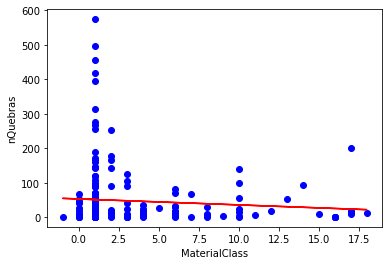

In [6]:
X = dados_bosch.loc[:, ['MaterialClass']]
y = dados_bosch.loc[:, ['nQuebras']]
print(len(X), len(y))
regmodel = LinearRegression().fit(X,y)
regmodel

#plotting result

plt.scatter(X,y, color='b')
plt.plot(X, regmodel.predict(X), color='r')
plt.xlabel('MaterialClass')
plt.ylabel('nQuebras')

Text(0, 0.5, 'nQuebras')

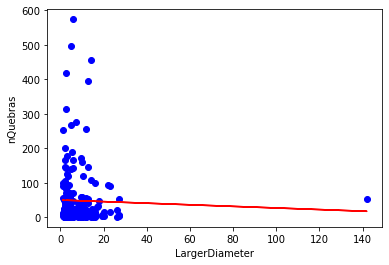

In [7]:
X0 = dados_bosch.loc[:, ['LargerDiameter']]


regmodel0 = LinearRegression().fit(X0,y)

#plotting result
plt.scatter(X0,y, color='b')
plt.plot(X0, regmodel0.predict(X0), color='r')
plt.xlabel('LargerDiameter')
plt.ylabel('nQuebras')

Text(0, 0.5, 'nQuebras')

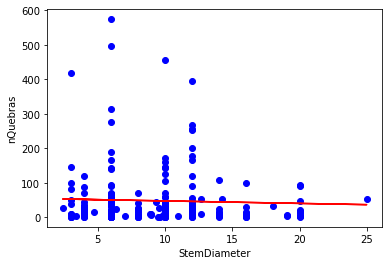

In [8]:
X1 = dados_bosch.loc[:, ['StemDiameter']]

regmodel1 = LinearRegression().fit(X1,y)

#plotting result

plt.scatter(X1,y, color='b')
plt.plot(X1, regmodel1.predict(X1), color='r')
plt.xlabel('StemDiameter')
plt.ylabel('nQuebras')

Text(0, 0.5, 'nQuebras')

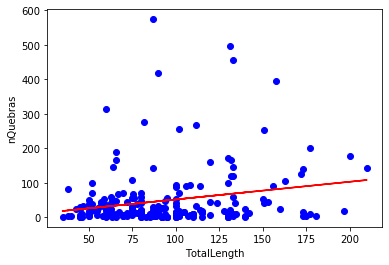

In [9]:
X2 = dados_bosch.loc[:, ['TotalLength']]

regmodel2 = LinearRegression().fit(X2,y)

#plotting result

plt.scatter(X2,y, color='b')
plt.plot(X2, regmodel2.predict(X2), color='r')
plt.xlabel('TotalLength')
plt.ylabel('nQuebras')

In [10]:
def xscale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    return  X_scaled

In [11]:
#Nomarlizando os dados
X_scaled = xscale(X)
regmodel = LinearRegression().fit(X_scaled,y)
regmodel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'nQuebras')

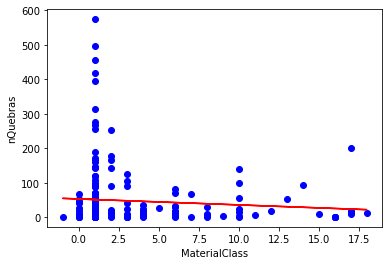

In [12]:
#plotting result
plt.scatter(X,y, color='b')
plt.plot(X, regmodel.predict(X_scaled), color='r')
plt.xlabel('MaterialClass')
plt.ylabel('nQuebras')

In [13]:
test = regmodel.predict(X[0:10])
test

array([[ 54.77887846],
       [ 22.0562324 ],
       [ 22.0562324 ],
       [ 22.0562324 ],
       [ 22.0562324 ],
       [ 54.77887846],
       [-10.66641366],
       [-10.66641366],
       [-10.66641366],
       [-10.66641366]])

In [14]:
from sklearn.metrics import r2_score

def calc_rss(y, predicted):
    return float(((predicted-y)**2).sum())

def calc_r2(y, predicted):
    return r2_score(y, predicted)

In [15]:
X_LeE = dados_bosch.loc[:,['LargerDiameter', 'StemDiameter']]
X_LEeTl = dados_bosch.loc[:,['LargerDiameter', 'StemDiameter','TotalLength' ]]

In [16]:
#not scaled

lin_reg_not = LinearRegression().fit(X_LeE,y)
r2_X_LeE_not = calc_r2(y,lin_reg_not.predict(X_LeE))


lin_reg_not2 = LinearRegression().fit(X_LEeTl,y)
r2_X_LEeTl_not = calc_r2(y,lin_reg_not2.predict(X_LEeTl))


print("R^2 de acordo com os atributos -- NOT:")
print("Not scaled-LargerDiameter + StemDiameter:  " + str(r2_X_LeE_not))
print("Not scaled-LargerDiameter + StemDiameter:  " + str(r2_X_LEeTl_not))

R^2 de acordo com os atributos -- NOT:
Not scaled-LargerDiameter + StemDiameter:  0.001602729600898689
Not scaled-LargerDiameter + StemDiameter:  0.059766287228487425
